In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

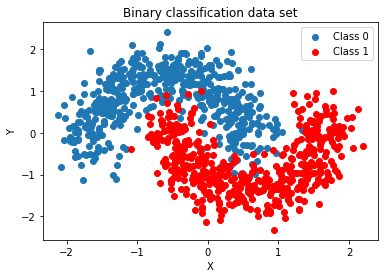

In [3]:
import matplotlib.pyplot as plt
x,y=make_moons(n_samples=1000,random_state=0,noise=0.2)
x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
fig,ax=plt.subplots()
ax.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
ax.scatter(x[y==1, 0], x[y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Binary classification data set');

In [47]:
# feature engineering
x_train2 = np.concatenate((x_train, x_train**3, x_train**4, x_train**5,np.sin(x_train),np.cos(x_train),np.exp(x_train)), axis=1)
x_test2 = np.concatenate((x_test, x_test**3,x_test**4,x_test**5,np.sin(x_test),np.cos(x_test),np.exp(x_test)), axis=1)
x_train3 = np.concatenate((x_train2,x_train2**2), axis=1)
x_test3 = np.concatenate((x_test2,x_test2**2), axis=1)


grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
grid_2d2 = np.concatenate((grid_2d, grid_2d**3,grid_2d**4,grid_2d**5,np.sin(grid_2d),np.cos(grid_2d),np.exp(grid_2d)), axis=1)
grid_2d3 = np.concatenate((grid_2d2,grid_2d2**2), axis=1)
X, Y = grid
print(grid_2d3.shape)

(10000, 28)


Test loss: 0.1138688400387764
Test accuracy: 0.9700000286102295


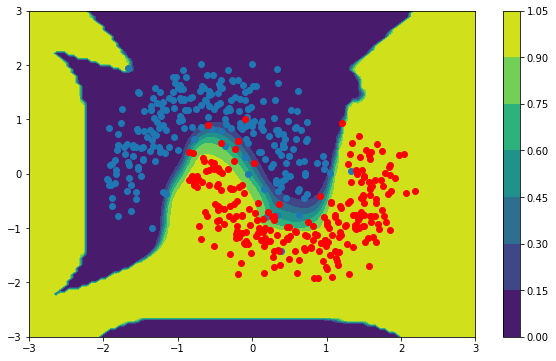

In [49]:
# Neural network with two hidden layers

model1=Sequential()
model1.add(Dense(16,activation='relu'))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam'
             ,loss='binary_crossentropy'
              ,metrics=['accuracy'])
import keras.callbacks
tb_callback=keras.callbacks.TensorBoard(log_dir='./Graph/model_1'
                            ,histogram_freq=True
                           ,write_graph=True
                            ,write_images=False)
model1.fit(x_train3, y_train, batch_size=32, epochs=200,
          verbose=0, validation_data=(x_test3, y_test),callbacks=[tb_callback])
score = model1.evaluate(x_test3, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

prediction_probs = model1.predict(grid_2d3, batch_size=32, verbose=0)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

Test loss: 0.12440242618322372
Test accuracy: 0.9660000205039978


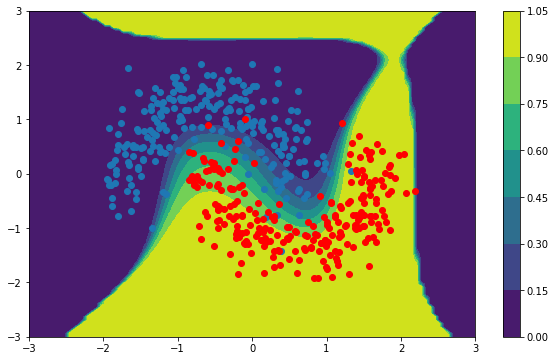

In [51]:
# Logistic Model
model2=Sequential()
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam'
             ,loss='binary_crossentropy'
              ,metrics=['accuracy'])
import keras.callbacks
tb_callback2=keras.callbacks.TensorBoard(log_dir='./Graph/model_1'
                            ,histogram_freq=True
                           ,write_graph=True
                            ,write_images=False)


model2.fit(x_train3, y_train, batch_size=16, epochs=200,
          verbose=0, validation_data=(x_test3, y_test),callbacks=[tb_callback2])
score = model2.evaluate(x_test3, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

prediction_probs = model2.predict(grid_2d3, batch_size=32, verbose=0)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

[0]	train-auc:0.95316	val-auc:0.96115
[1]	train-auc:0.96464	val-auc:0.96423
[2]	train-auc:0.96295	val-auc:0.96537
[3]	train-auc:0.96315	val-auc:0.96555
[4]	train-auc:0.96349	val-auc:0.96624
[5]	train-auc:0.96359	val-auc:0.96624
[6]	train-auc:0.96527	val-auc:0.96697
[7]	train-auc:0.97112	val-auc:0.97134
[8]	train-auc:0.97121	val-auc:0.97105
[9]	train-auc:0.97283	val-auc:0.97192
[10]	train-auc:0.97748	val-auc:0.97702
[11]	train-auc:0.98184	val-auc:0.97977
[12]	train-auc:0.98342	val-auc:0.98054
[13]	train-auc:0.98620	val-auc:0.98185
[14]	train-auc:0.98784	val-auc:0.98202
[15]	train-auc:0.99016	val-auc:0.98373
[16]	train-auc:0.99086	val-auc:0.98408
[17]	train-auc:0.99104	val-auc:0.98435
[18]	train-auc:0.99256	val-auc:0.98542
[19]	train-auc:0.99221	val-auc:0.98567
[20]	train-auc:0.99243	val-auc:0.98592
[21]	train-auc:0.99328	val-auc:0.98590
[22]	train-auc:0.99342	val-auc:0.98645
[23]	train-auc:0.99362	val-auc:0.98637
[24]	train-auc:0.99395	val-auc:0.98711
[25]	train-auc:0.99438	val-auc:0.98

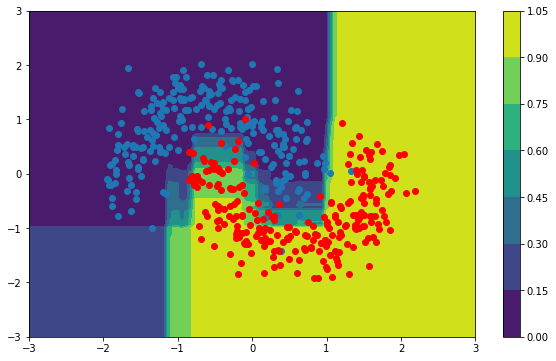

In [33]:
#XGBoost model
import xgboost as xgb
import numpy as np
from sklearn import metrics



dtrain = xgb.DMatrix(x_train3, label=y_train)
dval = xgb.DMatrix(x_test3, label=y_test)

# define the model hyperparameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 3,
    'lambda': 1,
    'alpha': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# train the model
num_rounds = 1000
watchlist = [(dtrain, 'train'), (dval, 'val')]
model3 = xgb.train(params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=10)

# evaluate the model
y_pred = model3.predict(dval)
auc = metrics.roc_auc_score(y_test, y_pred)
print(f"Validation AUC: {auc:.4f}")



dpred = xgb.DMatrix(grid_2d3)
prediction_probs = model3.predict(dpred)
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
